In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets, transforms


import numpy as np
import matplotlib.pyplot as plt


### Load saved state dicts onto the pretrained ResNet-152 model

In [2]:
from torchvision import models
pretrained_resnet152 = models.resnet152(pretrained=True)

In [3]:
state_dict = torch.load('resnet152_4000Iterations.pth',map_location='cuda:0')

from torchvision import models
model = models.resnet152(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, out_features=11)

model.load_state_dict(state_dict)

<All keys matched successfully>

###  Loop over the layers of the network and apply the metric functions on the conv layers  

- Here, the  the norm difference, cosine simularity, and sparsity between the corresponding conv layers is calculated.
- p# refers to a convolutional layer in the network pretrained on the ImageNet dataset.
- m# refers to the a convolutional layer in the network pretraiend on the CL-20 target dataset.

In [4]:
# Cosine similarity function
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

In [5]:
diff = []
cos_sim = []
sparsity = []

with torch.no_grad():
    for m in [0,1,2]:

        p1 = pretrained_resnet152.layer1[m].conv1.weight
        p2 = pretrained_resnet152.layer1[m].conv2.weight
        p3 = pretrained_resnet152.layer1[m].conv3.weight

        m1 = model.layer1[m].conv1.weight
        m2 = model.layer1[m].conv2.weight
        m3 = model.layer1[m].conv3.weight
        
        # Norm similarity

        diff1 = torch.norm(p1-m1).numpy()/torch.norm(p1)*100
        diff2 = torch.norm(p2-m2).numpy()/torch.norm(p2)*100
        diff3 = torch.norm(p3-m3).numpy()/torch.norm(p3)*100
        
        diff.append(diff1)
        diff.append(diff2)
        diff.append(diff3)
        
        #Cosine Similarity
        
        c1 = cos(p1.view(1,-1), m1.view(1,-1)).numpy()
        c2 = cos(p2.view(1,-1), m2.view(1,-1)).numpy()
        c3 = cos(p3.view(1,-1), m3.view(1,-1)).numpy()
        
        cos_sim.append(c1)
        cos_sim.append(c2)
        cos_sim.append(c3)
        
        
        
        #Sparisity
        comp1 = abs(m1) <= 1e-5*torch.ones(list(m1.shape))
        comp2 = abs(m2) <= 1e-5*torch.ones(list(m2.shape))
        comp3 = abs(m3) <= 1e-5*torch.ones(list(m3.shape))
        
        s1 = torch.sum(comp1)/torch.sum(torch.ones(list(m1.shape)))*100
        s2 = torch.sum(comp2)/torch.sum(torch.ones(list(m2.shape)))*100
        s3 = torch.sum(comp3)/torch.sum(torch.ones(list(m3.shape)))*100
        
        sparsity.append(s1)
        sparsity.append(s2)
        sparsity.append(s3)
        
    for m in [0,1,2,3,4,5,6,7]:
    
        p1 = pretrained_resnet152.layer2[m].conv1.weight
        p2 = pretrained_resnet152.layer2[m].conv2.weight
        p3 = pretrained_resnet152.layer2[m].conv3.weight

        m1 = model.layer2[m].conv1.weight
        m2 = model.layer2[m].conv2.weight
        m3 = model.layer2[m].conv3.weight

        diff1 = torch.norm(p1-m1).numpy()/torch.norm(p1)*100
        diff2 = torch.norm(p2-m2).numpy()/torch.norm(p2)*100
        diff3 = torch.norm(p3-m3).numpy()/torch.norm(p3)*100

        diff.append(diff1)
        diff.append(diff2)
        diff.append(diff3)
        
        c1 = cos(p1.view(1,-1), m1.view(1,-1)).numpy()
        c2 = cos(p2.view(1,-1), m2.view(1,-1)).numpy()
        c3 = cos(p3.view(1,-1), m3.view(1,-1)).numpy()
        
        cos_sim.append(c1)
        cos_sim.append(c2)
        cos_sim.append(c3)
        
        #Sparisity
        comp1 = abs(m1) <= 1e-5*torch.ones(list(m1.shape))
        comp2 = abs(m2) <= 1e-5*torch.ones(list(m2.shape))
        comp3 = abs(m3) <= 1e-5*torch.ones(list(m3.shape))
        
        s1 = torch.sum(comp1)/torch.sum(torch.ones(list(m1.shape)))*100
        s2 = torch.sum(comp2)/torch.sum(torch.ones(list(m2.shape)))*100
        s3 = torch.sum(comp3)/torch.sum(torch.ones(list(m3.shape)))*100
        
        sparsity.append(s1)
        sparsity.append(s2)
        sparsity.append(s3)
    
    for m in range(0,36):
        p1 = pretrained_resnet152.layer3[m].conv1.weight
        p2 = pretrained_resnet152.layer3[m].conv2.weight
        p3 = pretrained_resnet152.layer3[m].conv3.weight

        m1 = model.layer3[m].conv1.weight
        m2 = model.layer3[m].conv2.weight
        m3 = model.layer3[m].conv3.weight

        diff1 = torch.norm(p1-m1).numpy()/torch.norm(p1)*100
        diff2 = torch.norm(p2-m2).numpy()/torch.norm(p2)*100
        diff3 = torch.norm(p3-m3).numpy()/torch.norm(p3)*100

        diff.append(diff1)
        diff.append(diff2)
        diff.append(diff3)
        
        c1 = cos(p1.view(1,-1), m1.view(1,-1)).numpy()
        c2 = cos(p2.view(1,-1), m2.view(1,-1)).numpy()
        c3 = cos(p3.view(1,-1), m3.view(1,-1)).numpy()
        
        cos_sim.append(c1)
        cos_sim.append(c2)
        cos_sim.append(c3)
        
        #Sparisity
        comp1 = abs(m1) <= 1e-5*torch.ones(list(m1.shape))
        comp2 = abs(m2) <= 1e-5*torch.ones(list(m2.shape))
        comp3 = abs(m3) <= 1e-5*torch.ones(list(m3.shape))
        
        s1 = torch.sum(comp1)/torch.sum(torch.ones(list(m1.shape)))*100
        s2 = torch.sum(comp2)/torch.sum(torch.ones(list(m2.shape)))*100
        s3 = torch.sum(comp3)/torch.sum(torch.ones(list(m3.shape)))*100
        
        sparsity.append(s1)
        sparsity.append(s2)
        sparsity.append(s3)
        
    for m in [0,1,2]:
        
        p1 = pretrained_resnet152.layer4[m].conv1.weight
        p2 = pretrained_resnet152.layer4[m].conv2.weight
        p3 = pretrained_resnet152.layer4[m].conv3.weight

        m1 = model.layer4[m].conv1.weight
        m2 = model.layer4[m].conv2.weight
        m3 = model.layer4[m].conv3.weight

        diff1 = torch.norm(p1-m1).numpy()/torch.norm(p1)*100
        diff2 = torch.norm(p2-m2).numpy()/torch.norm(p2)*100
        diff3 = torch.norm(p3-m3).numpy()/torch.norm(p3)*100

        diff.append(diff1)
        diff.append(diff2)
        diff.append(diff3)
        
        c1 = cos(p1.view(1,-1), m1.view(1,-1)).numpy()
        c2 = cos(p2.view(1,-1), m2.view(1,-1)).numpy()
        c3 = cos(p3.view(1,-1), m3.view(1,-1)).numpy()
        
        cos_sim.append(c1)
        cos_sim.append(c2)
        cos_sim.append(c3)
        
        #Sparisity
        comp1 = abs(m1) <= 1e-5*torch.ones(list(m1.shape))
        comp2 = abs(m2) <= 1e-5*torch.ones(list(m2.shape))
        comp3 = abs(m3) <= 1e-5*torch.ones(list(m3.shape))
        
        s1 = torch.sum(comp1)/torch.sum(torch.ones(list(m1.shape)))*100
        s2 = torch.sum(comp2)/torch.sum(torch.ones(list(m2.shape)))*100
        s3 = torch.sum(comp3)/torch.sum(torch.ones(list(m3.shape)))*100
        
        sparsity.append(s1)
        sparsity.append(s2)
        sparsity.append(s3)


Text(0, 0.5, 'norm diff')

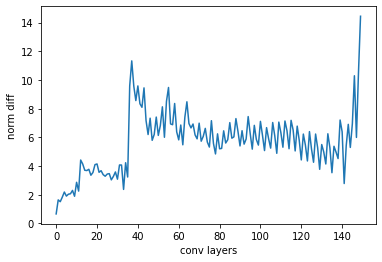

In [6]:
plt.plot(diff)
plt.xlabel('conv layers')
plt.ylabel('norm diff')

Text(0, 0.5, 'cos similarity')

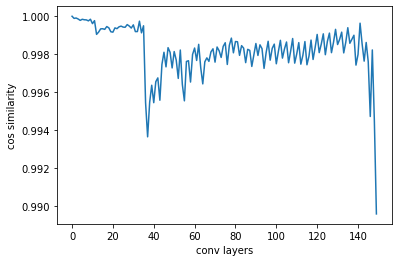

In [7]:
plt.plot(cos_sim)
plt.xlabel('conv layers')
plt.ylabel('cos similarity')

Text(0, 0.5, 'sparsity')

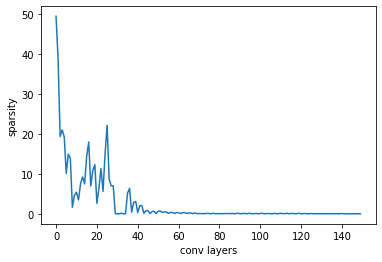

In [8]:
plt.plot(sparsity)
plt.xlabel('conv layers')
plt.ylabel('sparsity')

### Save the results

In [9]:
from numpy import savetxt

normdiff = np.array(diff)
cos_sim = np.array(cos_sim)

savetxt('1_normdiff_resnet152.csv', normdiff, delimiter=',')
savetxt('1_cos_sim_resnet152.csv', cos_sim, delimiter=',')